Import packages

In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, f1_score, recall_score, precision_score, log_loss
import sklearn
import matplotlib.pyplot as plt

Load data

In [21]:
X_train = pd.read_csv('Churn_data_train.csv').drop('Churn',axis=1).iloc[: , 1:]
y_train = pd.read_csv('Churn_data_train.csv').Churn
X_test = pd.read_csv('Churn_data_test.csv').drop('Churn',axis=1).iloc[: , 1:]
y_test = pd.read_csv('Churn_data_test.csv').Churn

Model Training

In [25]:
# Set the XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'max_depth': 8,
    'eval_metric': 'auc'
}

# Train the XGBoost model
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
model = xgb.train(params, dtrain)

Model Prediction

In [ ]:
# Evaluate the model on the testing set
y_pred = model.predict(dtest)
y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

Model Evaluation

In [33]:
# Calculate evaluation metrics
auc_score = roc_auc_score(y_test, y_pred)
ber_score = 1 - balanced_accuracy_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
logloss = log_loss(y_test, y_pred)

# Print the evaluation metrics
print("AUC score: {:.4f}".format(auc_score))
print("BER score: {:.4f}".format(ber_score))
print("F1 score: {:.4f}".format(f1))
print("Recall score: {:.4f}".format(recall))
print("Precision score: {:.4f}".format(precision))
print("Log loss: {:.4f}".format(logloss))

AUC score: 0.8180
BER score: 0.2730
F1 score: 0.5872
Recall score: 0.6464
Precision score: 0.5379
Log loss: 0.4730


The feature importance counts how many times a feature is used in all the trees of the model. 

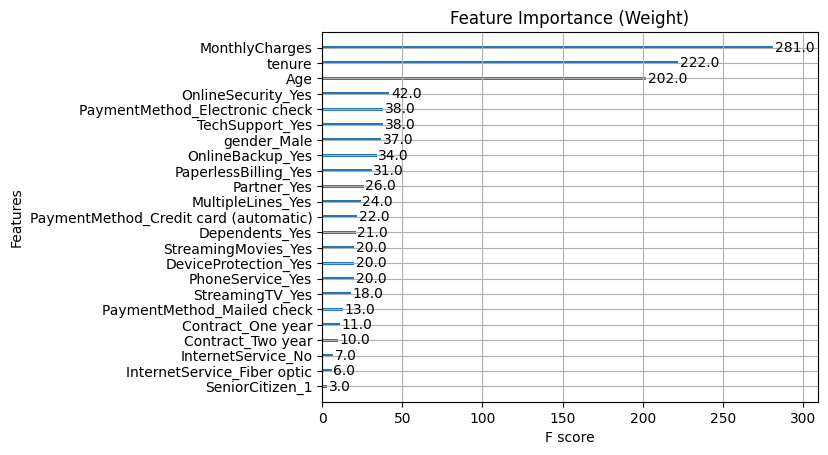

In [34]:
# Feature Importance
xgb.plot_importance(model, importance_type='weight', title='Feature Importance (Weight)')
plt.show()

High gain values indicate that a feature, when used, leads to significant improvements in model performance.

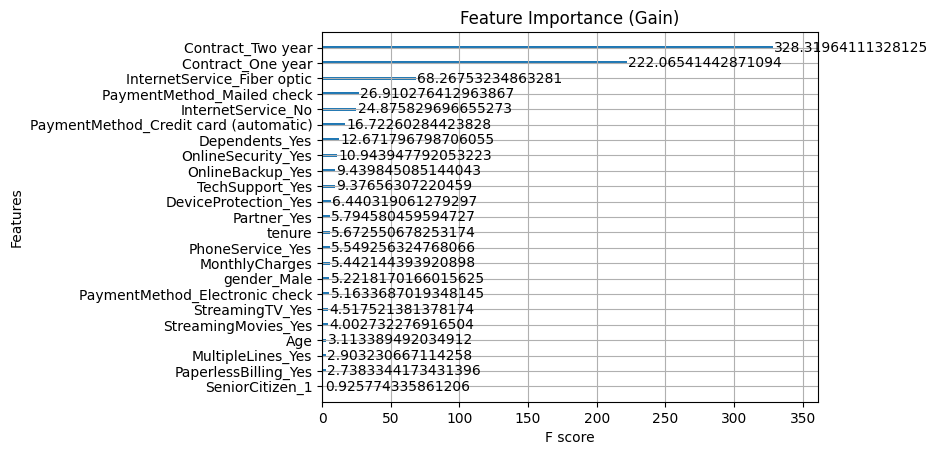

In [35]:
# Gain
xgb.plot_importance(model, importance_type='gain', title='Feature Importance (Gain)')
plt.show()

High cover values show that a feature influences a large number of observations when it is used, indicating its broad impact on the dataset.

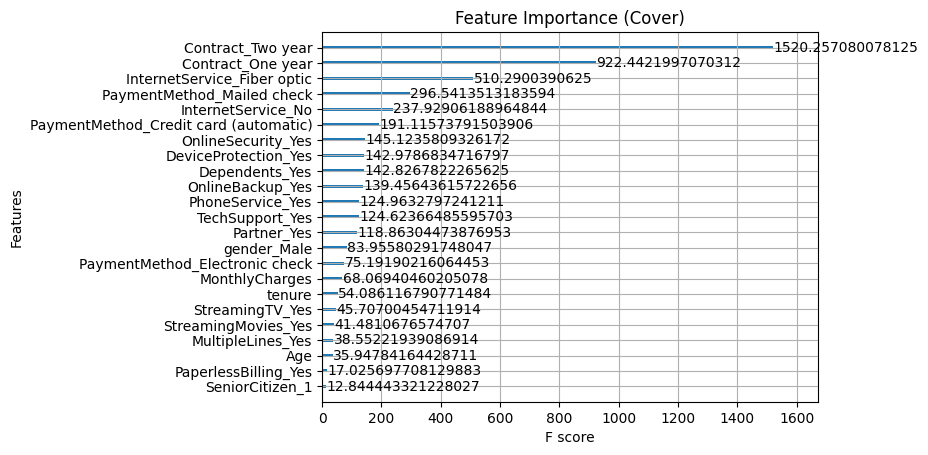

In [36]:
# Cover
xgb.plot_importance(model, importance_type='cover', title='Feature Importance (Cover)')
plt.show()

We can see that monthly charge, tenure, age have high weight values. Contract have high gain and cover values.

Confusion Matrix

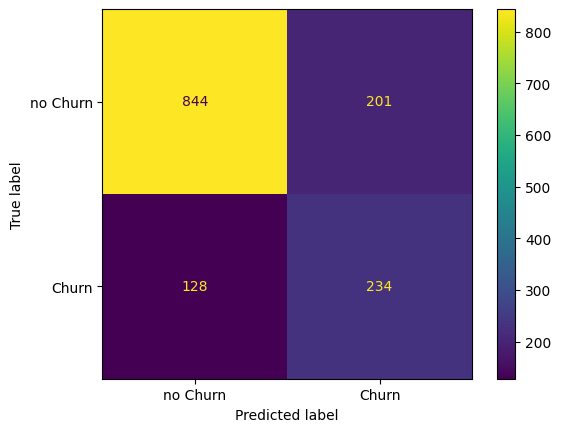

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_train = confusion_matrix(y_test, y_pred_binary)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = ['no Churn','Churn'])
cm_display.plot()
plt.show()

ROC Curve:

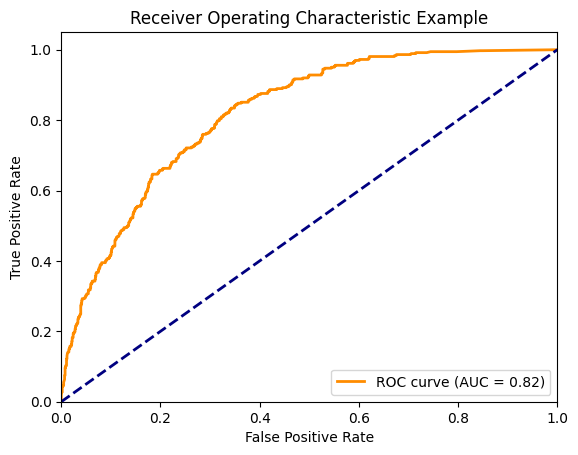

In [32]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()